In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun, m_p
import numpy as np
import os
from matplotlib.patches import Circle
import sys
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle
import astropy.units as u

sys.path.append('../my_funcs/')

from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs


import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')

import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa
from scipy.io import FortranFile as ff

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

ModuleNotFoundError: No module named 'pipeline_main_nosink'

In [ ]:
os.getcwd()

'/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python'

In [ ]:
#fmap = '/lustre/astro/troels/IMF_512/maps/map_x_00119.pkl'
# Creating the pickles can be done in:
#/groups/astro/kxm508/codes/dispatch2/experiments/ISM/python/my_python_utilities/convert.ipynb
fmap = 'my_python_utilities/map_x_00200.pkl'
f = open(fmap,'rb')
t = pickle.load(f,)
t.keys()

dict_keys(['map', 'settings'])

In [ ]:
t['settings']

rec.array([(15, 200, array([0, 1, 2, 3, 4, 5, 6], dtype=int16), b'x', b'/lustre/astro/troels/IMF_512', 32768)],
          dtype=[(('lmax', 'LMAX'), '>i2'), (('noutput', 'NOUTPUT'), '>i4'), (('type', 'TYPE'), 'O'), (('projection', 'PROJECTION'), 'O'), (('cwd', 'CWD'), 'O'), (('n', 'N'), '>i4')])

In [ ]:
dens, vx, vy, vz, bx, by, bz = t['map']


In [ ]:
sn = dis.snapshot(236,'sink80core01')
sn.time * sn.scaling.t / sn.cgs.yr

23066341.652704805

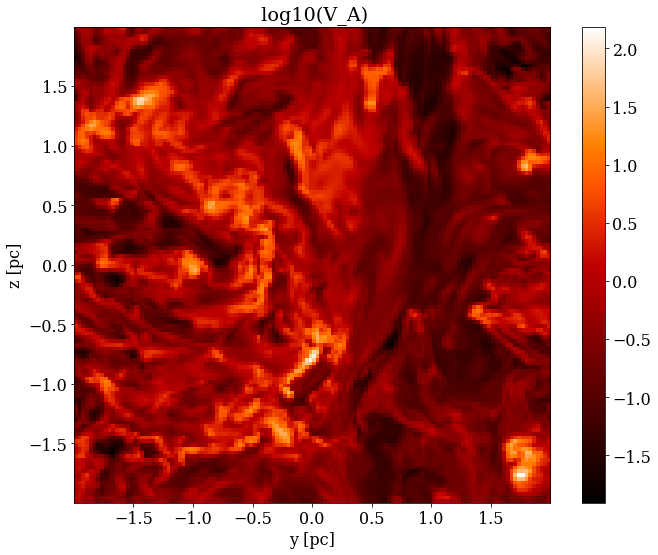

In [ ]:
plt.figure(figsize = (10,8))
w = 120*0.5**6
dgr.amr_plane(sn,'logd',to='pc',mesh=0,lmax=20,title=' log10(V_A)', cmap='gist_heat', axis=0);

In [8]:
data = pipeline_nosink(snap = 223, run = 'goodold13', sink_pos = np.array([0,0,0]))

Initialising patch data


100%|██████████| 4165/4165 [00:17<00:00, 244.61it/s]


In [9]:
width_au = 4 * data.sn.cgs.pc / data.sn.cgs.au 

# Data slurm file: 43290100

In [10]:
data_res1000 = np.genfromtxt('data_for_plotting/full_box.txt')

In [11]:
data_res1500 = np.genfromtxt('data_for_plotting/fullbox_1500_s80.txt')

In [ ]:
sink_ids = ['6', '13', '24', '80', '122','161', '180', '225', 'old13'];
sinks_pos = np.array([[0.67592005, 0.049702459, 0.78114466],
                      [0.058446889, 0.17560117, 0.76241307],
                      [0.31512337, 0.98594382, 0.063366837],
                      [0.83483083, 0.94080048, 0.30677056],
                      [0.71907158, 0.59524271, 0.34094426],
                      [0.22111029, 0.064107940, 0.023947020],
                      [0.96270836, 0.46696171, 0.97030800],
                      [0.31840596, 0.74889234, 0.95780638],
                      [0.69189513, 0.06412709, 0.78831232],
                      ]) - 0.5



In [ ]:
sinks_pos

In [13]:
data_res1500 * data.sn.scaling.m / data.sn.scaling.l**2

array([[3.47350244e+17, 3.47350244e+17, 3.47350244e+17, ...,
        2.86682561e+17, 2.86682561e+17, 2.86682561e+17],
       [3.47350244e+17, 3.47350244e+17, 3.47350244e+17, ...,
        2.86682561e+17, 2.86682561e+17, 2.86682561e+17],
       [3.47350244e+17, 3.47350244e+17, 3.47350244e+17, ...,
        2.86682561e+17, 2.86682561e+17, 2.86682561e+17],
       ...,
       [2.85857118e+17, 2.85857118e+17, 2.85857118e+17, ...,
        3.62335274e+17, 3.62335274e+17, 3.62335274e+17],
       [2.85857118e+17, 2.85857118e+17, 2.85857118e+17, ...,
        3.62335274e+17, 3.62335274e+17, 3.62335274e+17],
       [2.85857118e+17, 2.85857118e+17, 2.85857118e+17, ...,
        3.62335274e+17, 3.62335274e+17, 3.62335274e+17]])

In [14]:
np.log10(data_res1500 / 2.34 * data.cgs_density * data.sn.scaling.l).min()

16.402110500253006

(-371555.67153101607, -371555.67153101607)
(-267672.4035775401, -267672.4035775401)
(400968.6172513369, 400968.6172513369)
(363719.32654545456, 363719.32654545456)
(78587.96873262028, 78587.96873262028)
(-359669.2238395722, -359669.2238395722)
(-27261.00613368986, -27261.00613368986)
(205369.4548770054, 205369.4548770054)
(-359653.42252941174, -359653.42252941174)


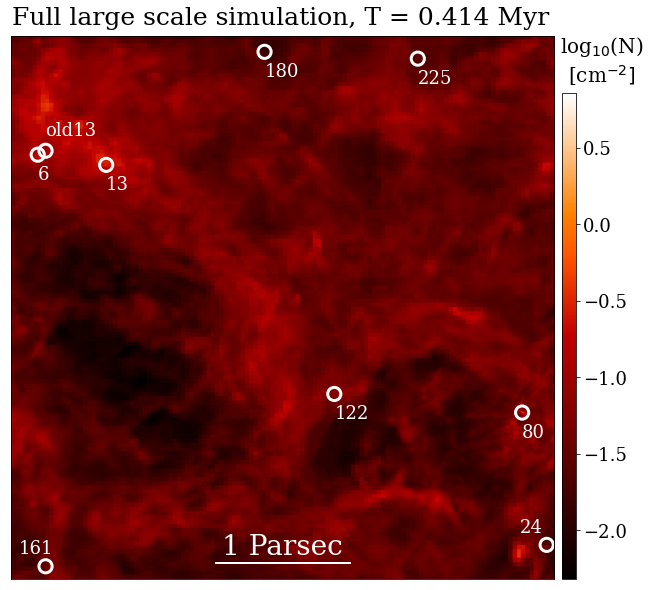

In [15]:
extent = width_au // 2 
fig, axs = plt.subplots(figsize = (10, 10))
axs.set_xticks([]); axs.set_yticks([])
cs = axs.imshow(np.log10(data_res1500 * data.cgs_density), extent = (-extent, extent, -extent, extent),
                 origin ='lower', cmap = 'gist_heat')

cbaxes = fig.add_axes([0.9, 0.125, 0.02, 0.675])
#cbar = fig.colorbar(cs, ax = axs, fraction = 0.04, pad = 0.01);
cbar = fig.colorbar(cs, cax = cbaxes)
                      
cbar.set_label('log$_{10}$(N)\n[cm$^{-2}]$', labelpad = -25, y = 1.12, rotation = 0, fontsize = 20)


cbar.ax.tick_params(labelsize=18)



for i, sink in enumerate(sink_ids):
    print((sinks_pos[i,1] * data.au_length, sinks_pos[i,-2] * data.au_length))
    sink_y = sinks_pos[i,1] * data.au_length; sink_z = sinks_pos[i,2] * data.au_length
    circle = plt.Circle((sink_y, sink_z), 1e4, fill = False, color = 'white', lw = 3)
    if sink == '24' or sink == '161':
        axs.text(sink_y - 4e4, sink_z + 4e4, sink, fontsize=18, verticalalignment='top', color = 'white')
    elif sink == 'old13':
        axs.text(sink_y, sink_z + 3e4, sink, fontsize=18, verticalalignment='center', color = 'white')
    else:
        axs.text(sink_y, sink_z - 3e4, sink, fontsize=18, verticalalignment='center', color = 'white')
    axs.add_patch(circle)


scalebar = AnchoredSizeBar(axs.transData, data.sn.cgs.pc / data.sn.cgs.au  , '1 Parsec', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)
#plt.tight_layout()
plt.suptitle('Full large scale simulation, T = 0.414 Myr', fontsize = 25 , x =0.51, y = 0.92, ha = 'center')
plt.show()

In [16]:
skip_cells = 1
dens_new = dens[::skip_cells, ::skip_cells]

(-371555.67153101607, -371555.67153101607)
(-267672.4035775401, -267672.4035775401)
(400968.6172513369, 400968.6172513369)
(363719.32654545456, 363719.32654545456)
(78587.96873262028, 78587.96873262028)
(-359669.2238395722, -359669.2238395722)
(-27261.00613368986, -27261.00613368986)
(205369.4548770054, 205369.4548770054)
(-359653.42252941174, -359653.42252941174)


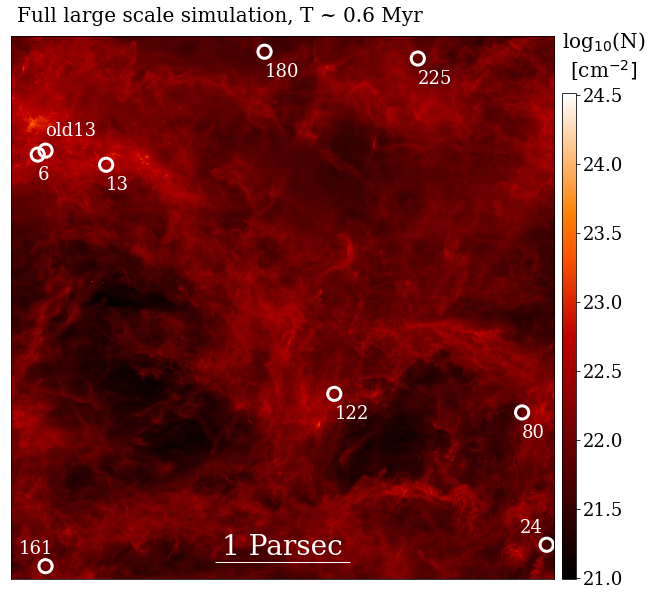

In [17]:
# Takes 3min to plot

fig, axs = plt.subplots(figsize = (10, 10))
axs.set_xticks([]); axs.set_yticks([])


cs = plt.imshow(np.log10(dens_new / 2**15 * data.cgs_density * 4 *data.sn.cgs.pc / (2.34 * m_p.to('g').value)), extent = (-extent, extent, -extent, extent), 
                origin ='lower', cmap = 'gist_heat')
cbaxes = fig.add_axes([0.9, 0.125, 0.02, 0.675])
cbar = fig.colorbar(cs, cax = cbaxes)
cbar.set_label('log$_{10}$(N)\n[cm$^{-2}]$', labelpad = -20, y = 1.13, rotation = 0, fontsize = 20)

cbar.ax.tick_params(labelsize=18)

for i, sink in enumerate(sink_ids):
    print((sinks_pos[i,1] * data.au_length, sinks_pos[i,-2] * data.au_length))
    sink_y = sinks_pos[i,1] * data.au_length; sink_z = sinks_pos[i,2] * data.au_length
    circle = plt.Circle((sink_y, sink_z), 1e4, fill = False, color = 'white', lw = 3)
    if sink == '24' or sink == '161':
        axs.text(sink_y - 4e4, sink_z + 4e4, sink, fontsize=18, verticalalignment='top', color = 'white')
    elif sink == 'old13':
        axs.text(sink_y, sink_z + 3e4, sink, fontsize=18, verticalalignment='center', color = 'white')
    else:
        axs.text(sink_y, sink_z - 3e4, sink, fontsize=18, verticalalignment='center', color = 'white')
    axs.add_patch(circle)


scalebar = AnchoredSizeBar(axs.transData, data.sn.cgs.pc / data.sn.cgs.au  , '1 Parsec', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)
# USE OUTPUT 214 (200), THEN THE TIME STAMP FITS
plt.suptitle('Full large scale simulation, T ~ 0.6 Myr', fontsize = 20 , x =0.425, y = 0.92, ha = 'center')
plt.savefig('graphics/all_sinks', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [18]:
(3000 * M_sun / (4 * u.cm * data.sn.cgs.pc)**2).to('g/cm^2')

<Quantity 0.03914852 g / cm2>

In [19]:
3000 * M_sun / (4 * u.cm * data.sn.cgs.pc)**2 / (2.34 * m_p) 

<Quantity 1.00023413e+22 1 / cm2>

In [20]:
0.5**9 * data.au_length

1611.5892379679144